In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
dataset = pd.read_csv('Fraud.csv')

In [31]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [32]:
dataset = dataset.rename(columns = {'oldbalanceOrg' :'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest' : 'newBalanceDest'})

In [33]:
dataset.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [34]:
#check for the null values
dataset.isnull().values.any()

True

In [35]:
#check duplicates
dataset.duplicated().sum()

0

In [36]:
dataset.shape

(1536598, 11)

# Exploratory data analysis

Which types of transactions are fraudulent?

In [37]:
print('\n types of fraudulent transaction are {}'.format(list(dataset.loc[dataset.isFraud == 1].type.drop_duplicates().values)))

datasetFraudTransfer = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'TRANSFER')]

datasetFraudCashout = dataset.loc[(dataset.isFraud == 1) & (dataset.type == 'CASH_OUT')]

print('\n number of fraudulent TRANSFERs = {}'.format(len(datasetFraudTransfer)))

print('\n number of fraudulent CASH_OUTs = {}'.format(len(datasetFraudCashout)))


 types of fraudulent transaction are ['TRANSFER', 'CASH_OUT']

 number of fraudulent TRANSFERs = 868

 number of fraudulent CASH_OUTs = 882


What determines whether the feature isFlaggedFraud gets set or not?

In [38]:
CountisFlaggedFraud = dataset.loc[(dataset.isFlaggedFraud == 1)]

CountisFlaggedFraudWithTransfer = dataset.loc[(dataset.isFlaggedFraud == 1) & (dataset.type == 'TRANSFER')]

print(len(CountisFlaggedFraud))
print(len(CountisFlaggedFraudWithTransfer))
print(dataset.shape)
print(CountisFlaggedFraudWithTransfer)

print('\n type of transactions in which isFlaggedFraud is set: \
{}'.format(list(dataset.loc[dataset.isFlaggedFraud == 1].type.drop_duplicates())))


datasetTransfer = dataset.loc[dataset.type == 'TRANSFER']
datasetFlagged = dataset.loc[dataset.isFlaggedFraud == 1]
datasetNotFlagged = dataset.loc[dataset.isFlaggedFraud == 0]

print('\n minimum amount transacted when isFlaggedFraud is set ={}'.format(datasetFlagged.amount.min()))

print('\n max amount transacted when isFlaggedFraud is set ={}'.format(datasetFlagged.amount.max()))

print('\n max amount is TRANSFERED when isFlaggedFraud is NOT set ={}'.format(datasetNotFlagged.amount.max()))

0
0
(1536598, 11)
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldBalanceOrig, newBalanceOrig, nameDest, oldBalanceDest, newBalanceDest, isFraud, isFlaggedFraud]
Index: []

 type of transactions in which isFlaggedFraud is set: []

 minimum amount transacted when isFlaggedFraud is set =nan

 max amount transacted when isFlaggedFraud is set =nan

 max amount is TRANSFERED when isFlaggedFraud is NOT set =10000000.0


In [39]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, oldBalanceDest = 0 and newBalanceDest = 0: {}'.format(len(datasetTransfer.loc[(datasetTransfer.isFlaggedFraud == 0) & (datasetTransfer.oldBalanceDest == 0) & (datasetTransfer.newBalanceDest == 0)])))


The number of TRANSFERs where isFlaggedFraud = 0, oldBalanceDest = 0 and newBalanceDest = 0: 930


In [40]:
print('\nThe number ofTRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and\
newBalanceDest=0:{}'.\
format(len(datasetTransfer.loc[(datasetTransfer.isFlaggedFraud == 0) &\
                           (datasetTransfer.oldBalanceDest == 0) &(datasetTransfer.newBalanceDest == 0)])))


The number ofTRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 andnewBalanceDest=0:930


In [41]:
print('\nHave Originators of transactions flagged as fraud transacted more than once? {}'
      .format((datasetFlagged.nameOrig.isin(pd.concat([datasetNotFlagged.nameOrig,datasetNotFlagged.nameDest]))).any()))


print('\nHave destinations for transactions flagged as fraud initiated other transactions? {}'
      .format((datasetFlagged.nameDest.isin(datasetNotFlagged.nameOrig)).any()))


print('\nHow many destination accounts of transactions as flagged as fraud have been destination accounts more than once?: {}'
     .format(sum(datasetFlagged.nameDest.isin(datasetNotFlagged.nameDest))))


Have Originators of transactions flagged as fraud transacted more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions as flagged as fraud have been destination accounts more than once?: 0


Checking are there any merchant accounts for Cash_in transaction

In [42]:
print('\nAre there any merchants among originators accounts for CASH_IN transactions? {}'
     .format((dataset.loc[dataset.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))


Are there any merchants among originators accounts for CASH_IN transactions? False


In [43]:
print('\nAre there any merchants among destination accounts for CASH_OUT \
transactions? {}'.format((dataset.loc[dataset.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))


Are there any merchants among destination accounts for CASH_OUT transactions? False


In [44]:
print('\nAre there merchants among any originator accounts? {}'.format(dataset.nameOrig.str.contains('M').any())) 

print('\nAre there any transactions having merchants among destination accountsother than the PAYMENT type? {}'.format((dataset.loc[dataset.nameDest.str.contains('M')].type != 'PAYMENT').any()))


Are there merchants among any originator accounts? False

Are there any transactions having merchants among destination accountsother than the PAYMENT type? False


In [45]:
print('\nWithin fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? {}'.format(\
(datasetFraudTransfer.nameDest.isin(datasetFraudCashout.nameOrig)).any())) 
datasetNotFraud = dataset.loc[dataset.isFraud == 0]


Within fraudulent transactions, are there destinations for TRANSFERS that are also originators for CASH_OUTs? False


In [46]:
print('\nFraudulent TRANSFERs whose destination accounts are originators of genuine\
CASH_OUTs: \n\n{}'.format(datasetFraudTransfer.loc[datasetFraudTransfer.nameDest.\
isin(datasetNotFraud.loc[datasetNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudulent TRANSFERs whose destination accounts are originators of genuineCASH_OUTs: 

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldBalanceOrig, newBalanceOrig, nameDest, oldBalanceDest, newBalanceDest, isFraud, isFlaggedFraud]
Index: []


In [47]:
print('\nFraudulent TRANSFER to C423543548 occured at step = 486 whereas \
genuine CASH_OUT from this account occured earlier at step = {}'.format(\
datasetNotFraud.loc[(datasetNotFraud.type == 'CASH_OUT') & (datasetNotFraud.nameOrig == \
                           'C423543548')].step.values)) 


Fraudulent TRANSFER to C423543548 occured at step = 486 whereas genuine CASH_OUT from this account occured earlier at step = []


Summary : 
When I started data analysis, firstly I concluded that only two types of transactions are possible to be fraudulent which are TRANSFERs and CASHOUTs. Then, I went for isFlaggedFraud feature. The purpose of this feature is to find out massive transfers. We find only 16 entries or datapoints where there’s massive transfer because isFlaggedFraud is set when there is a attempt of transfer more than 2 lakhs. Minimum amount transacted when isFlaggedFraud is set is 353874.22 , After certain findings it occurred that originators of transactions that have isFlaggedFraud set have transacted only once. Very few destination accounts of transactions that have isFlaggedFraud set have transacted more than once. Since only 2 destination accounts of 16 that have isFlaggedFraud set have been destination accounts more than once, clearly isFlaggedFraud being set is independent of whether a destination account has been used before or not.

isFlaggedFraud is set only 16 times so therefore final conclusion is that isFlaggedFraud is an insignificant feature and it should be discarded.

There are no merchant accounts in CASH-IN & CASH-OUT transactions however CASH-OUT involves some paying merchant but in destination account it is not true. Among originator and other than payment destination accounts, no accounts are merchant. So, we can say that among the accounts labels nameOrig and nameDest, for all transactions, the merchant prefix of 'M' occurs in an unexpacted way. Within fraudlent transactions, there are no destinations for TRANSFERs that are also originators for CASH_OUTs. So, finally  nemeOrig & nameDest features should be dropped.

# Data cleaning

In [48]:
X = dataset.loc[(dataset.type == 'TRANSFER') | (dataset.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

#X = X.loc[np.random.choice(X.index, 100000, replace = False)]

Y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int)

In [49]:
# imputing missing values

Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldBalanceDest == 0) & \
(Xfraud.newBalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldBalanceDest == 0) & \
(XnonFraud.newBalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.48342857142857143

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0018118047422797153


In [50]:
# labeling the data

X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), 
      ['oldBalanceDest', 'newBalanceDest']] = - 1
X.loc[(X.oldBalanceOrig == 0) & (X.newBalanceOrig == 0) & (X.amount != 0), 
      ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

Summary : 

After knowing only two types of transactions are fraudulent, so it’s necessary to assemble respective data from X for analysis. Then, required to do the missing value imputation task. 
The data has several transactions with zero balances in the destination account both before and after a non-zero amount is transacted. The fraction of such transactions, where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to genuine transactions (0.06%). Labeling to the data is done. 


In [51]:
# feature engineering

X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

# Data visualization 

In [52]:
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [53]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, 
             hue = hue, jitter = 0.4, marker = '.', 
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), 
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

Data visualization is an important tool for gaining insights and it would shown out the differences between fraudulent and genuine transactions. I have checked the dispersion over time and we can see that fraudulent transactions are more homogeneously disturbed fingerprints compared to genuine.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


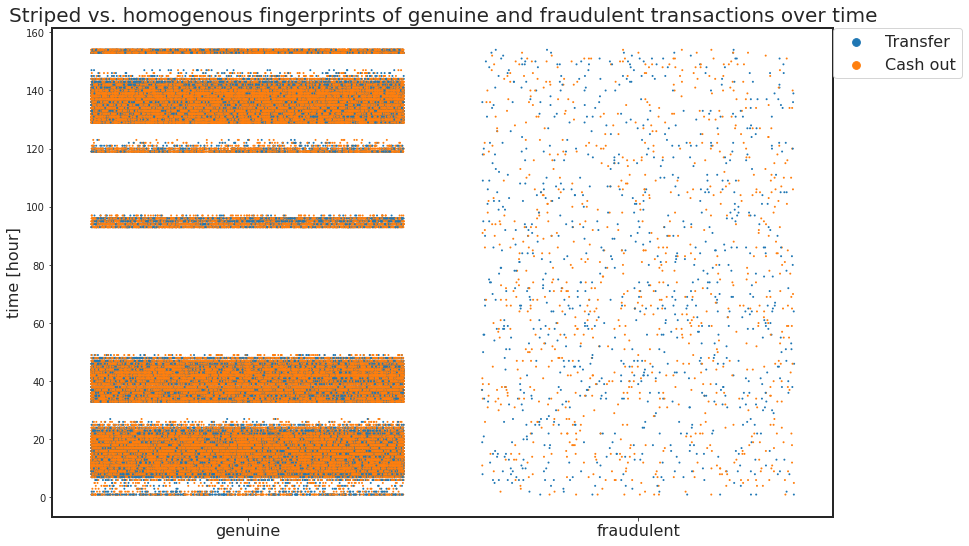

In [54]:
# dispersion over time

ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent transactions over time', size = 20);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


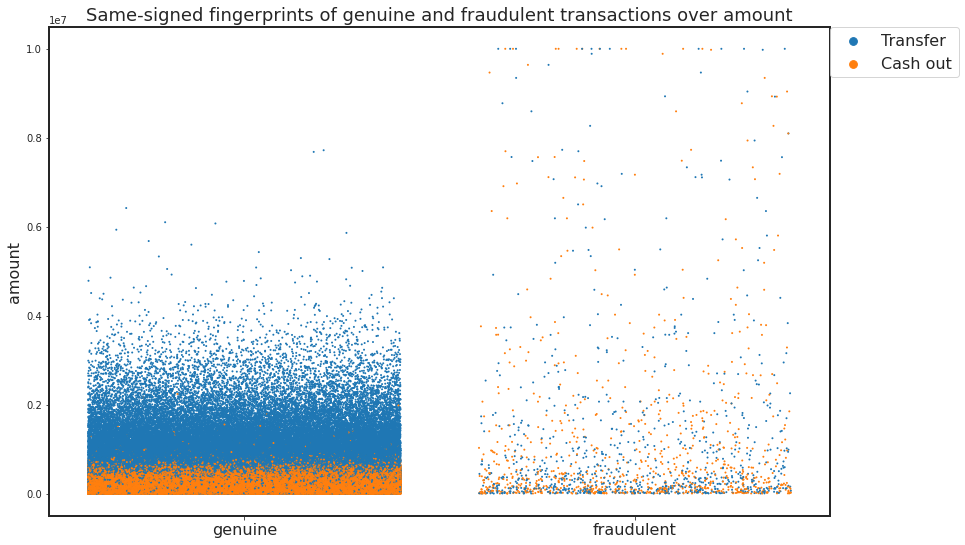

In [55]:
# dispersion over amount

limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

Observations :

The two plots above shows that although the presence of fraud in a transaction can be discerned by the original amount feature, the new errorBalanceDest feature is more effective at making a distinction. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


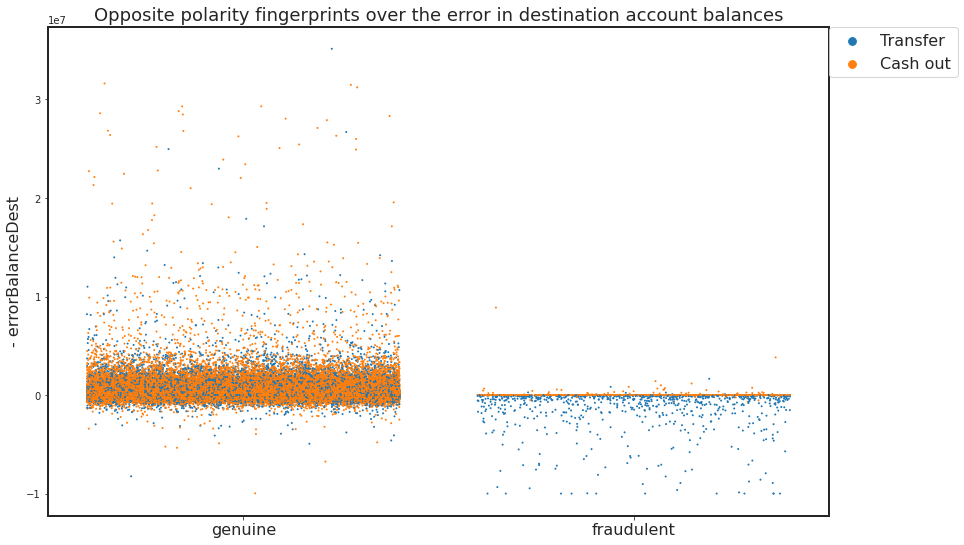

In [56]:
# dispersion over error in balance in destination accounts

limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('- errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in \
destination account balances', size = 18);

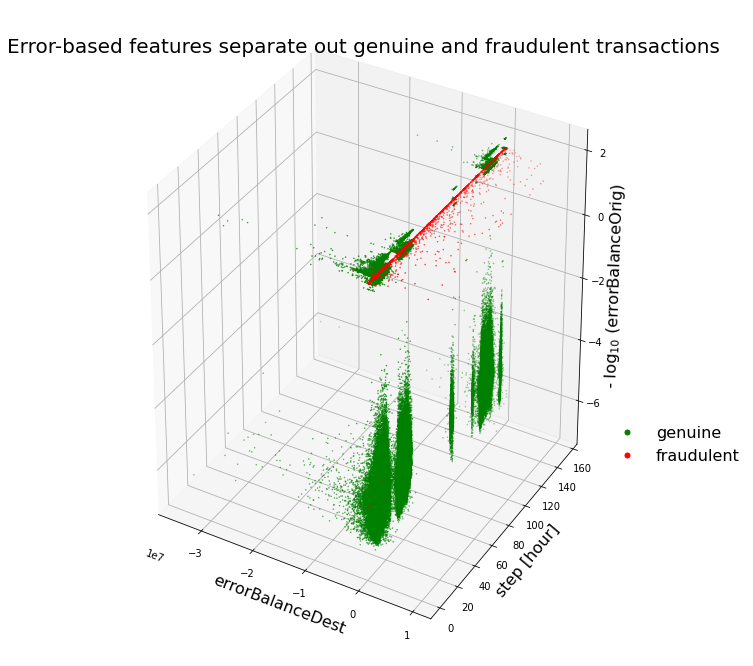

In [57]:
#long computatuiton time (copied code)
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent \
transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

Observations : 

The 3D plot below distinguishes best between fraud and non-fraud data by using both of the engineered error-based features. Clearly, the original step feature is ineffective in seperating out fraud. Note the striped nature of the genuine data vs time which was aniticipated from the 3D figure in section.

# Machine learning model

In [58]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz
import warnings

In [59]:
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))

skew = 0.002600668148799829


In [60]:
#Split the data into training and test sets in a 80:20 ratio

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = randomState)

There is a popular thought that the best ML algorithms for real world data are the ensemble learning techniques which are  based on decision tree. These algorithms performed well on imbalanced data. These are good at coping with missing values and it speeds up parallel processing. Among these, extreme gradient boosted used below here. AUPRC is used as Evaluation metrics.

In [61]:
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9852024190416581


What are the important features for the ML model?

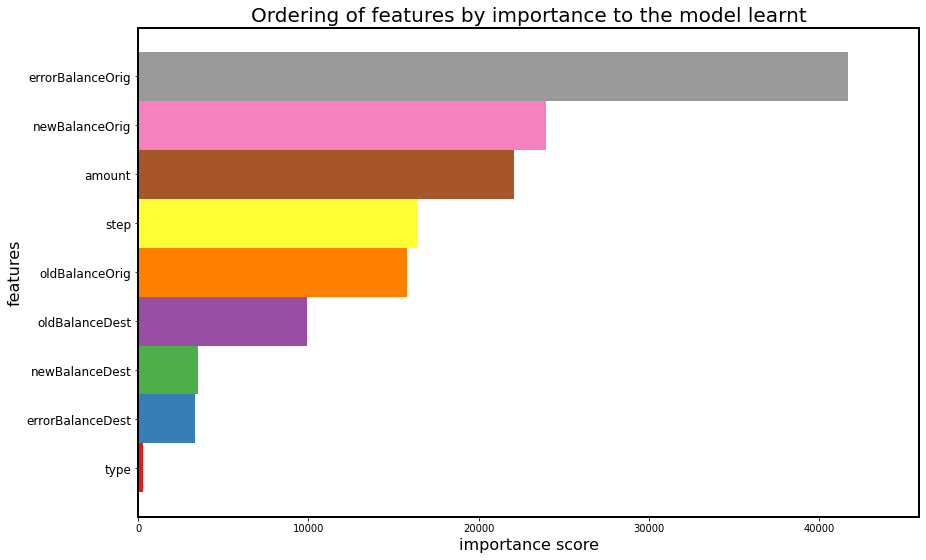

In [62]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);


The figure above shows that the new feature errorBalanceOrig that we created is the most relevant feature for the model. The features are ordered based on the number of samples affected by splits on those features.

In [ ]:
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\
                                         trainY, scoring = 'average_precision')

In [ ]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

In conclusion, we successfully developed a framework for detecting fraudulent transactions in financial data. This framework will help understand the nuances of fraud detection such as the creation of derived variables that may help separate the classes, addressing class imbalance and choosing the right machine learning algorithm. While experimenting various algorithms and after doing some research it occurred that tree-based model work well for transactions data.